1. The data were collected from [Lending Club](https://www.lendingclub.com/) between 2007 and 2017. The dataset was downloaded from [Kaggle](https://www.kaggle.com/wordsforthewise/lending-club).

**1. imports**

In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import missingno as msno

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

#set globally printing options
pd.set_option('display.max_colwidth', 1000, 'display.max_columns', None, 'display.max_rows', None)

#import os

**2. Load the accepted, rejected data**

In [2]:
#Load the data
accepted = pd.read_csv ('../Data/accepted_2007_to_2018Q4.csv.gz', compression ='gzip', low_memory=True)
rejected = pd.read_csv ('../Data/rejected_2007_to_2018Q4.csv.gz', compression ='gzip', low_memory=True)

C:\Users\dongw\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
warning_cols = accepted.iloc[:, [0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]].columns

In [4]:
warning_cols

Index(['id', 'desc', 'next_pymnt_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_type', 'hardship_reason',
       'hardship_status', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

**listed columns have mixed types, they mighe be removed because most of them are not available before loan initiation.**

In [5]:
# 2,260,701 rows(entries) x 151 columns(features) in accepted data 
accepted.info()
# 27,648,741 rows(entries) x 9 columns(features) in rejected data
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


**3. Explore the data**

In [6]:
#IDs have no duplicates
accepted.id.nunique()

2260701

In [7]:
accepted.shape[0]

2260701

In [8]:
#not availabele to investors
drop_list = ['id', 'member_id', 'funded_amnt_inv', 'pymnt_plan', 'url', 'initial_list_status', 'out_prncp_inv', 'total_pymnt',
                'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 
                'last_fico_range_low', 'policy_code', 'earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
                'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 
                'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
                'hardship_last_payment_amount',   'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
                'settlement_amount', 'settlement_percentage', 'settlement_term', 'verification_status', 'verification_status_joint', 'disbursement_method']

In [9]:
df = accepted.drop(columns = drop_list).copy()

In [10]:
# 42 features are droped from accepted, and df is new dataframe
df.shape

(2260701, 109)

In [11]:
# find the columns with the missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

count          %
sec_app_mths_since_last_major_derog  2224759  98.410139
sec_app_revol_util                   2154517  95.303050
revol_bal_joint                      2152681  95.221836
sec_app_mort_acc                     2152680  95.221792
sec_app_fico_range_low               2152680  95.221792
sec_app_earliest_cr_line             2152680  95.221792
sec_app_inq_last_6mths               2152680  95.221792
sec_app_fico_range_high              2152680  95.221792
sec_app_open_acc                     2152680  95.221792
sec_app_open_act_il                  2152680  95.221792
sec_app_num_rev_accts                2152680  95.221792
sec_app_chargeoff_within_12_mths     2152680  95.221792
sec_app_collections_12_mths_ex_med   2152680  95.221792
dti_joint                            2139995  94.660683
annual_inc_joint                     2139991  94.660506
desc                                 2134634  94.423544
mths_since_last_record               1901545  84.113069
mths_since_recent_bc_dlq             1741000  77.011511
mths_since_last_major_derog          1679926  74.309960
mths_since_recent_revol_delinq       1520342  67.250910
mths_since_last_delinq               1158535  51.246715
il_util                              1068883  47.281042
mths_since_rcnt_il                    909957  40.251099
all_util                              866381  38.323555
open_acc_6m                           866163  38.313912
total_cu_tl                           866163  38.313912
inq_last_12m                          866163  38.313912
open_rv_12m                           866162  38.313868
total_bal_il                          866162  38.313868
open_il_12m                           866162  38.313868
open_act_il                           866162  38.313868
open_rv_24m                           866162  38.313868
max_bal_bc                            866162  38.313868
inq_fi                                866162  38.313868
open_il_24m                           866162  38.313868
mths_since_recent_inq                 295468  13.069751
emp_title                             167002   7.387178
num_tl_120dpd_2m                      153690   6.798334
emp_length                            146940   6.499754
mo_sin_old_il_acct                    139104   6.153136
bc_util                                76104   3.366389
percent_bc_gt_75                       75412   3.335779
bc_open_to_buy                         74968   3.316140
mths_since_recent_bc                   73445   3.248771
pct_tl_nvr_dlq                         70464   3.116909
avg_cur_bal                            70379   3.113149
num_rev_accts                          70310   3.110097
mo_sin_rcnt_rev_tl_op                  70310   3.110097
mo_sin_old_rev_tl_op                   70310   3.110097
num_actv_bc_tl                         70309   3.110053
num_op_rev_tl                          70309   3.110053
num_bc_tl                              70309   3.110053
tot_cur_bal                            70309   3.110053
tot_coll_amt                           70309   3.110053
num_rev_tl_bal_gt_0                    70309   3.110053
total_rev_hi_lim                       70309   3.110053
num_tl_30dpd                           70309   3.110053
num_tl_90g_dpd_24m                     70309   3.110053
num_tl_op_past_12m                     70309   3.110053
num_il_tl                              70309   3.110053
num_actv_rev_tl                        70309   3.110053
total_il_high_credit_limit             70309   3.110053
num_accts_ever_120_pd                  70309   3.110053
mo_sin_rcnt_tl                         70309   3.110053
tot_hi_cred_lim                        70309   3.110053
num_bc_sats                            58623   2.593134
num_sats                               58623   2.593134
total_bal_ex_mort                      50063   2.214490
total_bc_limit                         50063   2.214490
mort_acc                               50063   2.214490
acc_open_past_24mths                   50063   2.214490
title  

Text(0, 0.5, 'feature count')

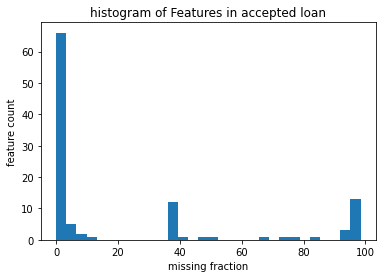

In [12]:
missing.iloc[:,1].plot.hist(bins=30)
plt.title('histogram of Features in accepted loan')
plt.xlabel('missing fraction')
plt.ylabel('feature count')

Some features miss less than 20% and other group miss 'lots' of data (from ~40% to 100%)

In [13]:
# check which features are missing 30% of data
miss30 = missing[missing.iloc[:,1] >= 30]
miss30.sort_values(by = '%', ascending = True).head(20)

count          %
inq_fi                           866162  38.313868
max_bal_bc                       866162  38.313868
open_rv_24m                      866162  38.313868
open_rv_12m                      866162  38.313868
total_bal_il                     866162  38.313868
open_il_12m                      866162  38.313868
open_act_il                      866162  38.313868
open_il_24m                      866162  38.313868
inq_last_12m                     866163  38.313912
open_acc_6m                      866163  38.313912
total_cu_tl                      866163  38.313912
all_util                         866381  38.323555
mths_since_rcnt_il               909957  40.251099
il_util                         1068883  47.281042
mths_since_last_delinq          1158535  51.246715
mths_since_recent_revol_delinq  1520342  67.250910
mths_since_last_major_derog     1679926  74.309960
mths_since_recent_bc_dlq        1741000  77.011511
mths_since_last_record          1901545  84.113069
desc                            2134634  94.423544

In [14]:
#isolate missing and complete values in features inq_fi 
missing_inq_fi = df[df['inq_fi'].isna()]                           
complete_inq_fi = df[~df['inq_fi'].isna()]

In [15]:
df1 = missing_inq_fi.describe()
df1.head()

loan_amnt    funded_amnt       int_rate    installment  \
count  866129.000000  866129.000000  866129.000000  866129.000000   
mean    14749.069509   14735.354087      13.269892     436.709770   
std      8427.298753    8421.588529       4.384089     244.028465   
min       500.000000     500.000000       5.320000       4.930000   
25%      8000.000000    8000.000000       9.990000     260.850000   

          annual_inc            dti    delinq_2yrs  fico_range_low  \
count  866125.000000  866128.000000  866100.000000   866129.000000   
mean    74944.175003      18.103277       0.313920      694.943496   
std     64759.935375       8.333148       0.861532       30.477180   
min         0.000000       0.000000       0.000000      610.000000   
25%     45000.000000      11.890000       0.000000      670.000000   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count    866129.000000   866100.000000           422043.000000   
mean        698.943596        0.696707               34.060451   
std          30.477676        1.000915               21.886308   
min         614.000000        0.000000                0.000000   
25%         674.000000        0.000000               15.000000   

       mths_since_last_record       open_acc        pub_rec      revol_bal  \
count           133220.000000  866100.000000  866100.000000  866129.000000   
mean                70.245624      11.533619       0.194235   16911.076176   
std                 28.230552       5.304135       0.580358   22431.685896   
min                  0.000000       0.000000       0.000000       0.000000   
25%                 51.000000       8.000000       0.000000    6448.000000   

          revol_util      total_acc      out_prncp  total_rec_prncp  \
count  865638.000000  866100.000000  866129.000000    866129.000000   
mean       55.153091      25.260603     375.137897     12587.214131   
std        23.817929      11.831452    1654.349648      8374.544584   
min         0.000000       1.000000       0.000000         0.000000   
25%        37.800000      17.000000       0.000000      6000.000000   

       total_rec_int  total_rec_late_fee     recoveries  \
count  866129.000000        8.661290e+05  866129.000000   
mean     3125.672299        1.526060e+00     219.879780   
std      3214.992434        1.094415e+01     928.554139   
min         0.000000       -9.500000e-09       0.000000   
25%      1029.040000        0.000000e+00       0.000000   

       collection_recovery_fee  collections_12_mths_ex_med  \
count            866129.000000               865984.000000   
mean                 35.498057                    0.014147   
std                 162.284980                    0.133301   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   

       mths_since_last_major_derog  annual_inc_joint   dti_joint  \
count                215563.000000        348.000000  346.000000   
mean                     43.051243     107692.914799   17.935087   
std                      21.144615      49048.811859    7.050205   
min                       0.000000      17950.000000    3.050000   
25%                      26.000000      75000.750000   13.090000   

       acc_now_delinq   tot_coll_amt    tot_cur_bal  open_acc_6m  open_act_il  \
count   866100.000000  795853.000000  795853.000000          0.0          0.0   
mean         0.004995     224.167549  139344.429452          NaN          NaN   
std          0.077771   10441.200973  153703.616936          NaN          NaN   
min          0.000000       0.000000       0.000000          NaN          NaN   
25%          0.000000       0.000000   29795.000000          NaN          NaN   

       open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
count          0.0          0.0                 0.0           0.0      0.0   
mean           NaN          NaN                 NaN           NaN      NaN   
std            NaN      

In [16]:
df2 = complete_inq_fi.describe()
df2.head()

loan_amnt   funded_amnt      int_rate   installment    annual_inc  \
count  1.394539e+06  1.394539e+06  1.394539e+06  1.394539e+06  1.394539e+06   
mean   1.523193e+04  1.523191e+04  1.298286e+01  4.514569e+02  7.988565e+04   
std    9.629097e+03  9.629098e+03  5.087502e+00  2.804407e+02  1.340686e+05   
min    1.000000e+03  1.000000e+03  5.310000e+00  7.610000e+00  0.000000e+00   
25%    8.000000e+03  8.000000e+03  9.440000e+00  2.469100e+02  4.700000e+04   

                dti   delinq_2yrs  fico_range_low  fico_range_high  \
count  1.392829e+06  1.394539e+06    1.394539e+06     1.394539e+06   
mean   1.927250e+01  3.025064e-01    7.008519e+02     7.048521e+02   
std    1.680940e+01  8.707220e-01    3.429574e+01     3.429682e+01   
min   -1.000000e+00  0.000000e+00    6.600000e+02     6.640000e+02   
25%    1.190000e+01  0.000000e+00    6.750000e+02     6.790000e+02   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count    1.394538e+06           680123.000000           225936.000000   
mean     5.023872e-01               34.839063               73.531748   
std      7.973428e-01               21.903972               25.285924   
min      0.000000e+00                0.000000                0.000000   
25%      0.000000e+00               16.000000               57.000000   

           open_acc       pub_rec     revol_bal    revol_util     total_acc  \
count  1.394539e+06  1.394539e+06  1.394539e+06  1.393228e+06  1.394539e+06   
mean   1.166133e+01  1.995728e-01  1.650156e+04  4.734580e+01  2.348059e+01   
std    5.839693e+00  5.643060e-01  2.326202e+04  2.478647e+01  1.203312e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
25%    8.000000e+00  0.000000e+00  5.643000e+03  2.810000e+01  1.500000e+01   

          out_prncp  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count  1.394539e+06     1.394539e+06   1.394539e+06        1.394539e+06   
mean   6.586741e+03     7.591930e+03   2.000177e+03        1.513729e+00   
std    8.422089e+03     7.690687e+03   2.176243e+03        1.236624e+01   
min    0.000000e+00     0.000000e+00   0.000000e+00       -3.900000e-09   
25%    0.000000e+00     2.164375e+03   5.968300e+02        0.000000e+00   

         recoveries  collection_recovery_fee  collections_12_mths_ex_med  \
count  1.394539e+06             1.394539e+06                1.394539e+06   
mean   9.667618e+01             1.683045e+01                2.062904e-02   
std    6.050441e+02             1.068863e+02                1.606806e-01   
min    0.000000e+00             0.000000e+00                0.000000e+00   
25%    0.000000e+00             0.000000e+00                0.000000e+00   

       mths_since_last_major_derog  annual_inc_joint      dti_joint  \
count                365212.000000     120362.000000  120360.000000   
mean                     44.821145     123670.699737      19.255602   
std                      21.732472      74216.812915       7.823902   
min                       0.000000       5693.510000       0.000000   
25%                      28.000000      83500.000000      13.530000   

       acc_now_delinq  tot_coll_amt   tot_cur_bal   open_acc_6m   open_act_il  \
count    1.394539e+06  1.394539e+06  1.394539e+06  1.394538e+06  1.394539e+06   
mean     3.621985e-03  2.376193e+02  1.442886e+05  9.344199e-01  2.779407e+00   
std      6.402620e-02  7.194434e+03  1.645213e+05  1.140700e+00  3.000784e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%      0.000000e+00  0.000000e+00  2.867300e+04  0.000000e+00  1.000000e+00   

        open_il_12m   open_il_24m  mths_since_rcnt_il  total_bal_il  \
count  1.394539e+06  1.394539e+06        1.350744e+06  1.394539e+06   
mean   6.764314e-01  1.562752e+00        2.122236e+01  3.550665e+04   
std    9.256354e-01  1.578672e+00        2.604919e+01  4.409746e+04   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.

In [17]:
# subset the df1 for the columns with NaN
df3 = df1.loc[:, df1.isna().any()]
missing_inq_fi_columns = df3.columns
missing_inq_fi_columns

Index(['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
       'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object')

**feature inq_fi includes missing data ~38%. Isolate the portions of missing and complete data of inq_fi. We can find the two sets of features having the same missing pattern. What types of the data, what is the infomation they include?**

<AxesSubplot:>

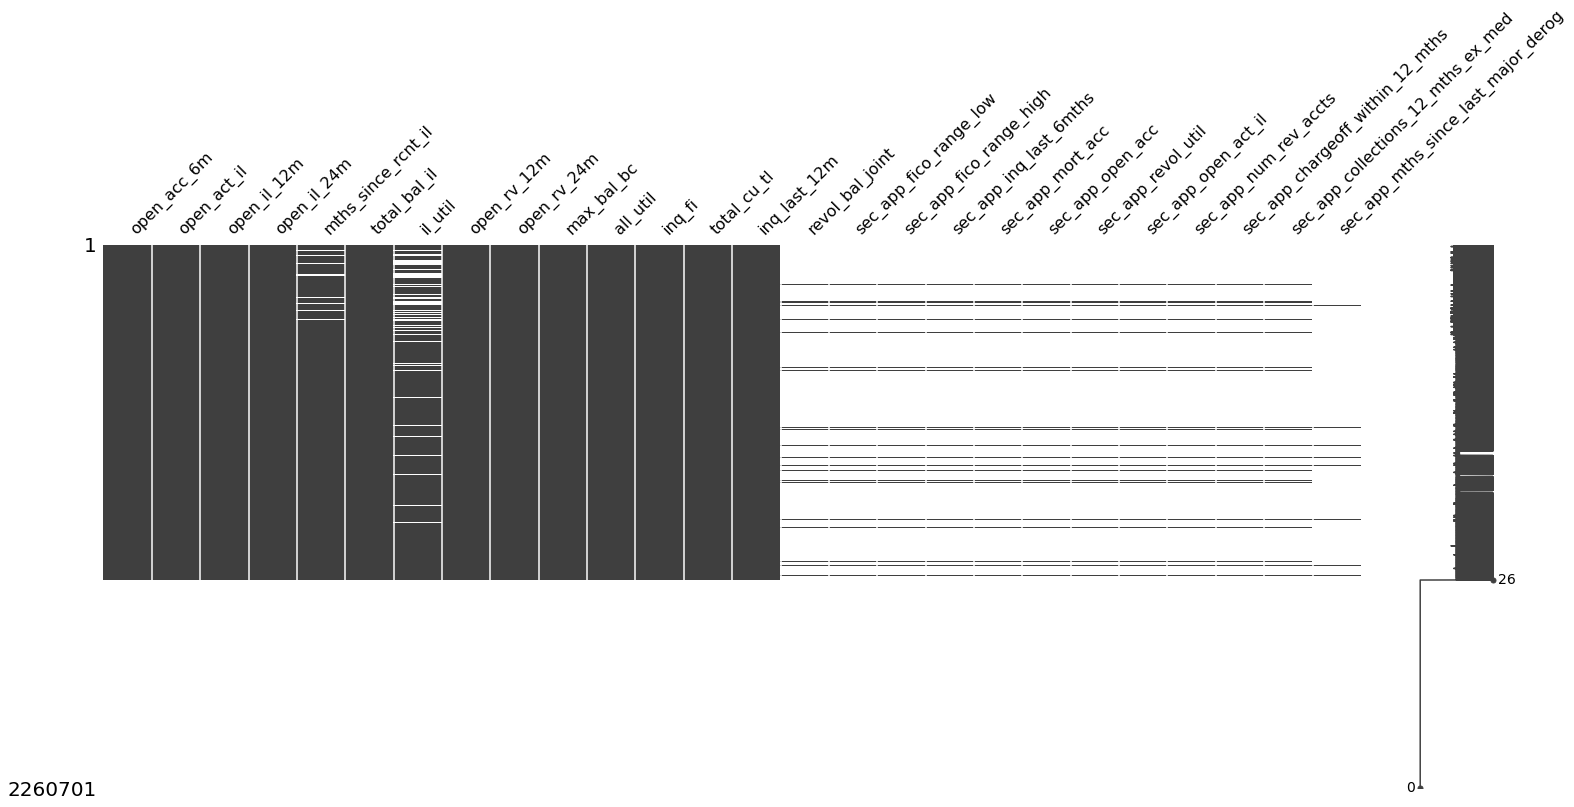

In [18]:
sorted_accepted = accepted[missing_inq_fi_columns].sort_values(by = 'open_il_24m')
msno.matrix(sorted_accepted)

In [19]:
#
group1 = ['revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
       'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog']

In [20]:
#group1 has 95% of values are missing, will be dropped
group1_missing = miss30[['%']].loc[group1].mean(axis=0)
group1_missing

%    95.494263
dtype: float64

In [21]:
df.shape

(2260701, 109)

In [22]:
df.drop(columns = group1, axis=1, inplace=True)

In [23]:
#group1 features are dropped
df.shape

(2260701, 97)

In [24]:
group2=['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

In [25]:
#group2 has 95% of values are missing, will be dropped
group2_missing = miss30[['%']].loc[group2].mean(axis=0)
group2_missing

%    39.093456
dtype: float64

**group 2 include the variable related to inqueries (inq_last_12m, inq_fi), balance (all_util, max_bal_bc, total_bal_il), accounts (open_acc_6m, 'open_act_il', 'open_il_12m', 'open_il_24m','open_rv_12m','open_rv_24m'),'il_util':Ratio of total current balance to high credit/credit limit on all install acct, total_cu_tl: Number of finance trades. most of the features represented recent activies which were collected by some time points and sicne they have high missing rate, we will drop them.**

In [26]:
df.drop(columns = group2, axis=1, inplace=True)

In [27]:
df.shape

(2260701, 83)

In [28]:
# Now Let us go back the list in which the features having more than 30% of data missing
featurelist30 = miss30.sort_values(by = '%', ascending = True).index.tolist()
len(featurelist30)

35

In [29]:
featurelist30

['inq_fi',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'total_bal_il',
 'open_il_12m',
 'open_act_il',
 'open_il_24m',
 'inq_last_12m',
 'open_acc_6m',
 'total_cu_tl',
 'all_util',
 'mths_since_rcnt_il',
 'il_util',
 'mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_last_record',
 'desc',
 'annual_inc_joint',
 'dti_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'revol_bal_joint',
 'sec_app_revol_util',
 'sec_app_mths_since_last_major_derog']

In [30]:
group12 = group1 + group2

In [31]:
group12

['revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [32]:
len(group12)

26

In [33]:
group3 = set(featurelist30)-set(group12)
group3

{'annual_inc_joint',
 'desc',
 'dti_joint',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'sec_app_earliest_cr_line'}

In [34]:
group3_missing = miss30[['%']].loc[group3].sort_values(by = '%', ascending = False)
group3_missing

%
sec_app_earliest_cr_line        95.221792
dti_joint                       94.660683
annual_inc_joint                94.660506
desc                            94.423544
mths_since_last_record          84.113069
mths_since_recent_bc_dlq        77.011511
mths_since_last_major_derog     74.309960
mths_since_recent_revol_delinq  67.250910
mths_since_last_delinq          51.246715

**follow the same logic, recent colleted data/activites with high missing values are exclued, mths_since_last_delinq with 51% missing value meaning:The number of months since the borrower's last delinquency, which is highly related to delinquency and maybe default. We will keep this feature.**

In [35]:
group3_missing_list = group3_missing.sort_values(by = '%', ascending = True).index.tolist()
group3_missing_list

['mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_last_record',
 'desc',
 'annual_inc_joint',
 'dti_joint',
 'sec_app_earliest_cr_line']

In [36]:
group3_missing_list.pop(0)

'mths_since_last_delinq'

In [37]:
group3_missing_list

['mths_since_recent_revol_delinq',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_last_record',
 'desc',
 'annual_inc_joint',
 'dti_joint',
 'sec_app_earliest_cr_line']

In [38]:
df.drop(columns = group3_missing_list, axis=1, inplace=True)

In [39]:
df.shape

(2260701, 75)

In [40]:
#Select column names with dtype 'object'
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'application_type'],
      dtype='object')

In [41]:
#convert issue date to date format
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [42]:
df['issue_d'].value_counts(dropna = False)

2016-03-01    61992
2015-10-01    48631
2018-05-01    46311
2018-10-01    46305
2018-08-01    46079
2015-07-01    45962
2015-12-01    44343
2017-08-01    43573
2018-07-01    43089
2018-04-01    42928
2017-11-01    42343
2018-11-01    41973
2018-06-01    41533
2018-12-01    40134
2017-09-01    39713
2016-02-01    39529
2017-07-01    39415
2018-09-01    39026
2014-10-01    38783
2018-03-01    38771
2017-12-01    38154
2017-10-01    38151
2017-06-01    38087
2017-05-01    37681
2015-11-01    37530
2017-03-01    37181
2016-04-01    36432
2018-01-01    36347
2016-08-01    36280
2016-12-01    36183
2015-08-01    35886
2015-04-01    35427
2015-01-01    35107
2016-07-01    34696
2016-11-01    34591
2016-06-01    33019
2016-10-01    32772
2018-02-01    32746
2016-01-01    32366
2015-05-01    31913
2017-01-01    31835
2017-04-01    29683
2014-07-01    29306
2015-09-01    28641
2015-06-01    28485
2016-05-01    28403
2016-09-01    28144
2017-02-01    27763
2015-03-01    25400
2014-11-01    25054


In [43]:
df['term'].value_counts(dropna = False)

 36 months    1609754
 60 months     650914
NaN                33
Name: term, dtype: int64

In [44]:
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [45]:
# drop records with unknown issue date, term, and loan_status
df = df[~df.issue_d.isna()]
df = df[~df.term.isna()] 
df = df[~df.loan_status.isna()] 

In [46]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60}).astype('int')

In [47]:
df['term'].value_counts(dropna = False)

36    1609754
60     650914
Name: term, dtype: int64

In [48]:
df['loan_status'].value_counts(normalize = True)

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

drop loan status are not defaults/non-defaults

In [49]:
status_drop = ['Current', 'Late (16-30 days)', 'In Grace Period']

In [55]:
df = df[~df.loan_status.isin(status_drop)]

In [56]:
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1076751
Charged Off                                             268559
Late (31-120 days)                                       21467
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [57]:
df.shape

(1369566, 75)

In [62]:
loan_status_map = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Default',
    'Late (31-120 days)': 'Default',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Default',
    'Default': 'Default'   
}

In [63]:
df.loan_status = df.loan_status.map(loan_status_map).astype('object')

In [64]:
df['loan_status'].value_counts(normalize = True)

Fully Paid    0.78765
Default       0.21235
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

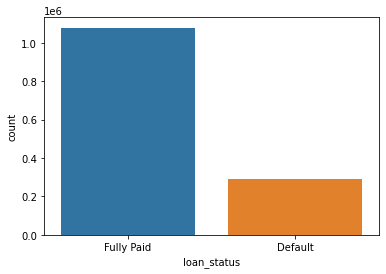

In [65]:
sns.countplot(df.loan_status)

In [68]:
df.emp_title.nunique()

383313

In [69]:
df.zip_code.nunique()

946

In [70]:
df.addr_state.nunique()

51

There are many unique values of emp_title, zip_code, they are not included for prediction. We keep stat infor so far, so we can tell if default is worse or better in some states or not.

In [72]:
df.drop(columns=['emp_title', 'zip_code'], inplace=True)

In [73]:
df.shape

(1369566, 73)

In [74]:
df['emp_length'].value_counts(dropna = False)

10+ years    449252
2 years      124063
< 1 year     110566
3 years      109662
1 year        90285
5 years       85645
4 years       82176
NaN           80401
6 years       63798
8 years       61566
7 years       60495
9 years       51657
Name: emp_length, dtype: int64

In [75]:
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

In [76]:
df.emp_length = df.emp_length.map(emp_length_map).fillna(0).astype('int')

Text(0.5, 1.0, 'Employment Length')

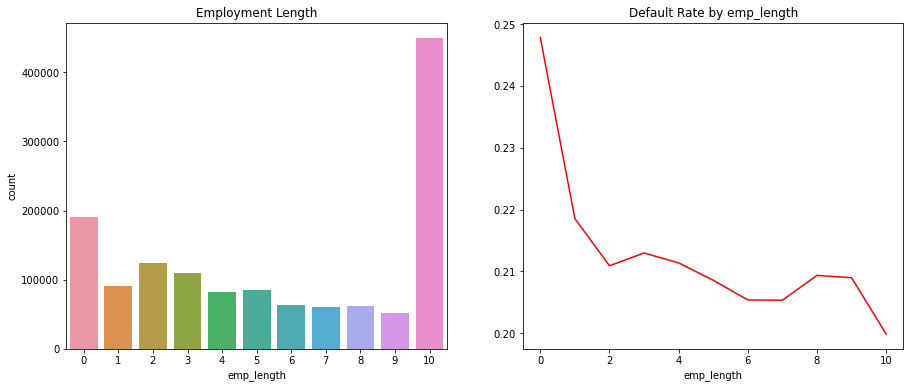

In [103]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(df.emp_length, ax = axes[0])
df.groupby('emp_length')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].plot(kind='line', title='Default Rate by emp_length', c = 'r')
axes[0].set_title('Employment Length')             

In [104]:
df['home_ownership'].value_counts(dropna = False)

MORTGAGE    676160
RENT        545154
OWN         147713
ANY            304
OTHER          182
NONE            53
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

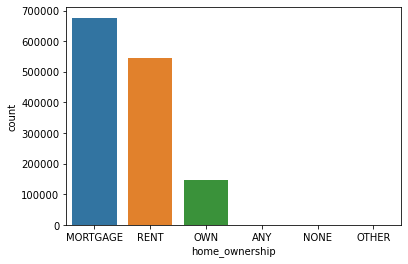

In [105]:
sns.countplot(df.home_ownership)

Minimize the group by fill the least number group with riskiest categety 'rent', so we don't underestimate the default.

In [106]:
home_ownership_map = {
    'MORTGAGE': 'MORTGAGE',
    'RENT': 'RENT',
    'OWN': 'OWN',
    'ANY': 'RENT',
    'OTHER': 'RENT',
    'NONE': 'RENT'   
}

In [107]:
df.home_ownership = df.home_ownership.map(home_ownership_map)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

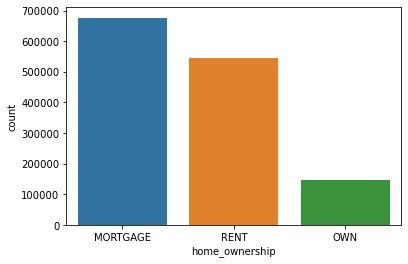

In [108]:
sns.countplot(df.home_ownership)

In [109]:
df['purpose'].value_counts(dropna = False)

debt_consolidation    793917
credit_card           299639
home_improvement       89162
other                  79905
major_purchase         30118
small_business         15916
medical                15908
car                    14844
moving                  9704
vacation                9245
house                   7485
wedding                 2350
renewable_energy         950
educational              423
Name: purpose, dtype: int64

In [110]:
df['title'].value_counts(dropna = False)

Debt consolidation                                                                  673279
Credit card refinancing                                                             253869
Home improvement                                                                     76512
Other                                                                                68375
Major purchase                                                                       24612
NaN                                                                                  16943
Debt Consolidation                                                                   15763
Medical expenses                                                                     13870
Business                                                                             12092
Car financing                                                                        11416
Vacation                                                                              8204

title is similar as purpose but have more details, only keep purpose

In [111]:
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [112]:
purpose_map = {
    'debt_consolidation': 'debt_consolidation', 
    'small_business': 'small_business', 
    'home_improvement': 'home_improvement',
    'major_purchase': 'major_purchase', 
    'credit_card': 'credit_card', 
    'other': 'other', 
    'house': 'home_improvement', 
    'vacation': 'other',
    'car': 'other', 
    'medical': 'other', 
    'moving': 'other', 
    'renewable_energy': 'other', 
    'wedding': 'other',
    'educational': 'other'
}

In [113]:
df['purpose'] = df.purpose.map(purpose_map) # reassign some groups

In [114]:
df.drop(columns=['title'], inplace=True)

In [115]:
df.shape

(1369566, 72)

Text(0.5, 1.0, 'application_type')

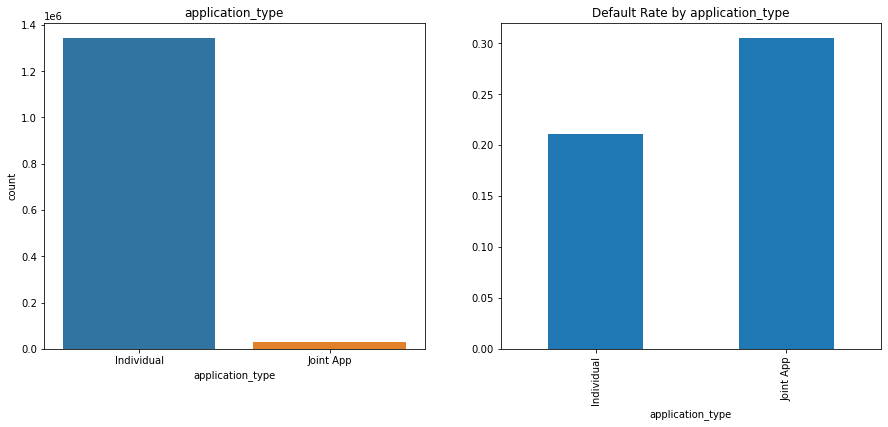

In [118]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(df.application_type, ax = axes[0])
df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].plot(kind='bar', title='Default Rate by application_type')
axes[0].set_title('application_type')             

There are more individual application types but joint applications has higher default rates.

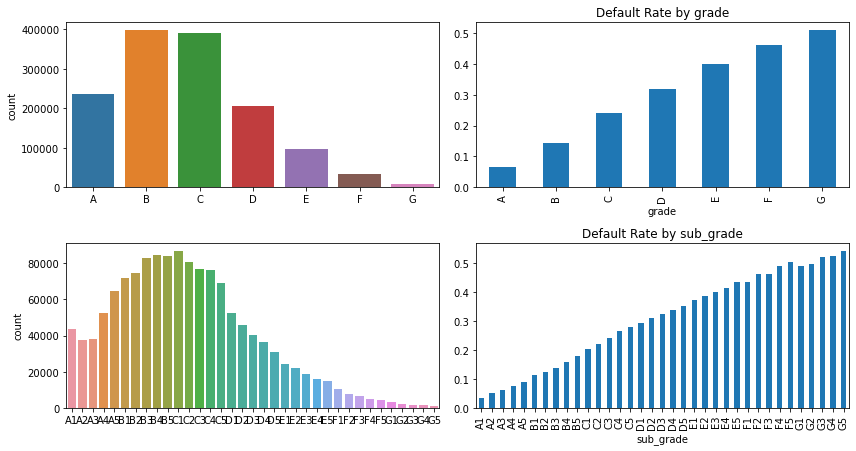

In [156]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
#grade = sorted(data.grade.unique().tolist())
#sns.countplot(x='grade', data=data, hue='loan_status', order=grade)
sns.countplot(sorted(df.grade))

plt.subplot(4, 2, 2)
df.groupby('grade')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].plot(kind='bar', title='Default Rate by grade')

plt.subplot(4, 2, 3)
sns.countplot(sorted(df.sub_grade))

plt.subplot(4, 2, 4)
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:, 'Default'].plot(kind='bar', title='Default Rate by sub_grade')

plt.subplots_adjust(hspace = 0.8)
plt.tight_layout()

most of the grade are B and C, with the lower grade is, there are more likely default, there are [25 rank to decide base risk](https://www.lendingclub.com/foliofn/rateDetail.action). the rank calculation happens after the borrower applying the loan, so they might not be useful for model prediction.

Numeric Features

In [199]:
df.shape

(1369566, 72)

In [200]:
df.describe().T

count           mean            std  \
loan_amnt                   1369566.0   14448.774283    8737.506570   
funded_amnt                 1369566.0   14440.100495    8733.728330   
term                        1369566.0      41.850951      10.304818   
int_rate                    1369566.0      13.279112       4.784094   
installment                 1369566.0     438.759304     262.010546   
emp_length                  1369566.0       5.608010       3.846882   
annual_inc                  1369562.0   76250.092671   70310.781229   
dti                         1369168.0      18.303684      11.311968   
delinq_2yrs                 1369537.0       0.318285       0.879336   
fico_range_low              1369566.0     696.101988      31.814218   
fico_range_high             1369566.0     700.102127      31.814869   
inq_last_6mths              1369536.0       0.661674       0.958930   
mths_since_last_delinq       679440.0      34.282178      21.921864   
open_acc                    1369537.0      11.591343       5.482311   
pub_rec                     1369537.0       0.215452       0.604005   
revol_bal                   1369566.0   16250.940120   22438.266690   
revol_util                  1368642.0      51.776155      24.536734   
total_acc                   1369537.0      24.947305      12.009019   
out_prncp                   1369566.0     178.618117    1765.847914   
total_rec_prncp             1369566.0   12067.772766    8857.484055   
total_rec_int               1369566.0    2411.762195    2614.164558   
total_rec_late_fee          1369566.0       1.782100      11.941589   
recoveries                  1369566.0     237.493452     949.586896   
collection_recovery_fee     1369566.0      39.586715     166.753297   
collections_12_mths_ex_med  1369421.0       0.017225       0.147293   
acc_now_delinq              1369537.0       0.005022       0.076941   
tot_coll_amt                1299290.0     249.117092   10975.751057   
tot_cur_bal                 1299290.0  140928.402175  157452.744863   
total_rev_hi_lim            1299290.0   32763.181769   36549.367384   
acc_open_past_24mths        1319536.0       4.699449       3.191977   
avg_cur_bal                 1299267.0   13465.562620   16272.325963   
bc_open_to_buy              1305362.0   10182.314068   15340.170989   
bc_util                     1304583.0      59.891199      28.304785   
chargeoff_within_12_mths    1369421.0       0.009078       0.109668   
delinq_amnt                 1369537.0      14.896711     810.284504   
mo_sin_old_il_acct          1260457.0     125.728821      52.315639   
mo_sin_old_rev_tl_op        1299289.0     181.291235      94.609471   
mo_sin_rcnt_rev_tl_op       1299289.0      13.107025      16.344698   
mo_sin_rcnt_tl              1299290.0       7.849263       8.726518   
mort_acc                    1319536.0       1.663617       1.996450   
mths_since_recent_bc        1306300.0      23.783212      30.726805   
mths_since_recent_inq       1190992.0       6.706832       5.848440   
num_accts_ever_120_pd       1299290.0       0.510676       1.328311   
num_actv_bc_tl              1299290.0       3.644190       2.251625   
num_actv_rev_tl             1299290.0       5.645733       3.307367   
num_bc_sats                 1310976.0       4.735759       2.956412   
num_bc_tl                   1299290.0       8.086887       4.797981   
num_il_tl                   1299290.0       8.563900       7.389701   
num_op_rev_tl               1299290.0       8.279303       4.564433   
num_rev_accts               1299289.0      14.589596       8.119205   
num_rev_tl_bal_gt_0         1299290.0       5.594179       3.220198   
num_sats                    1310976.0      11.638509       5.490141   
num_tl_120dpd_2m            1248056.0       0.000811       0.030318   
num_tl_30dpd                1299290.0       0.003412       0.062269   
num_tl_90g_dpd_24m          1299290.0       0.088974       0.504956   
num_tl_op_past_12m          1299290.0       2.181829    

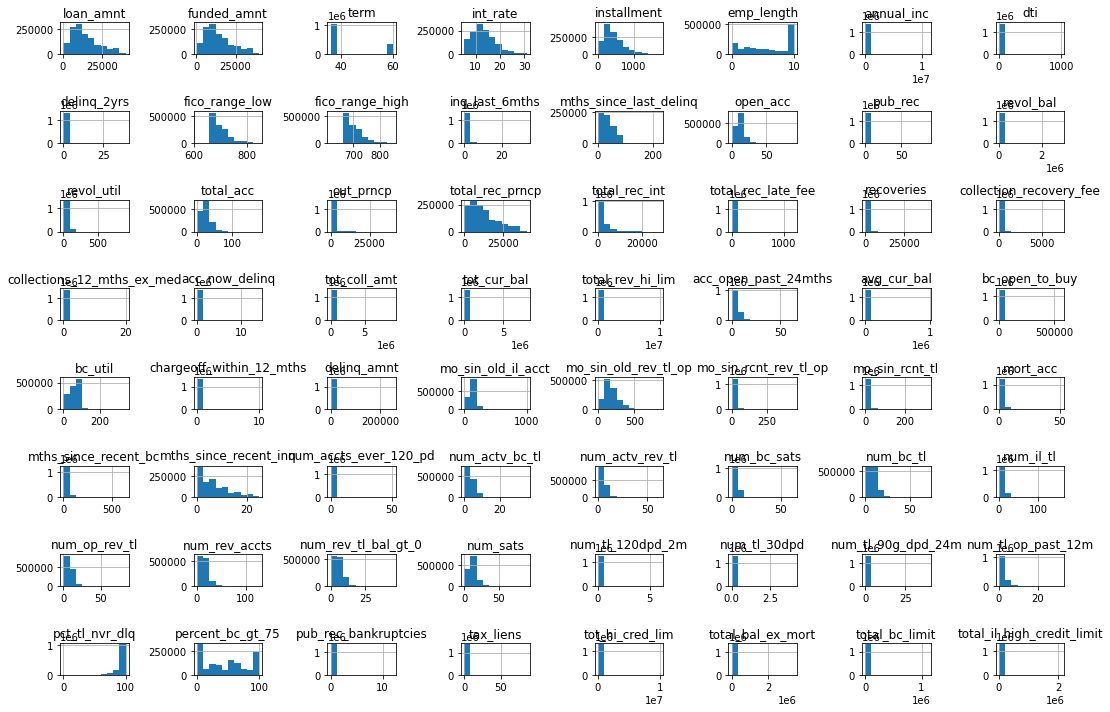

In [204]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=1)
plt.tight_layout()

There are quite some variables cluseter down the the low end, and some of them have most of the values is 0 even they have some varibility.

In [205]:
zerovalue = ['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'out_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
            'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'chargeoff_within_12_mths', 'delinq_amnt',
            'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies', 'tax_liens']

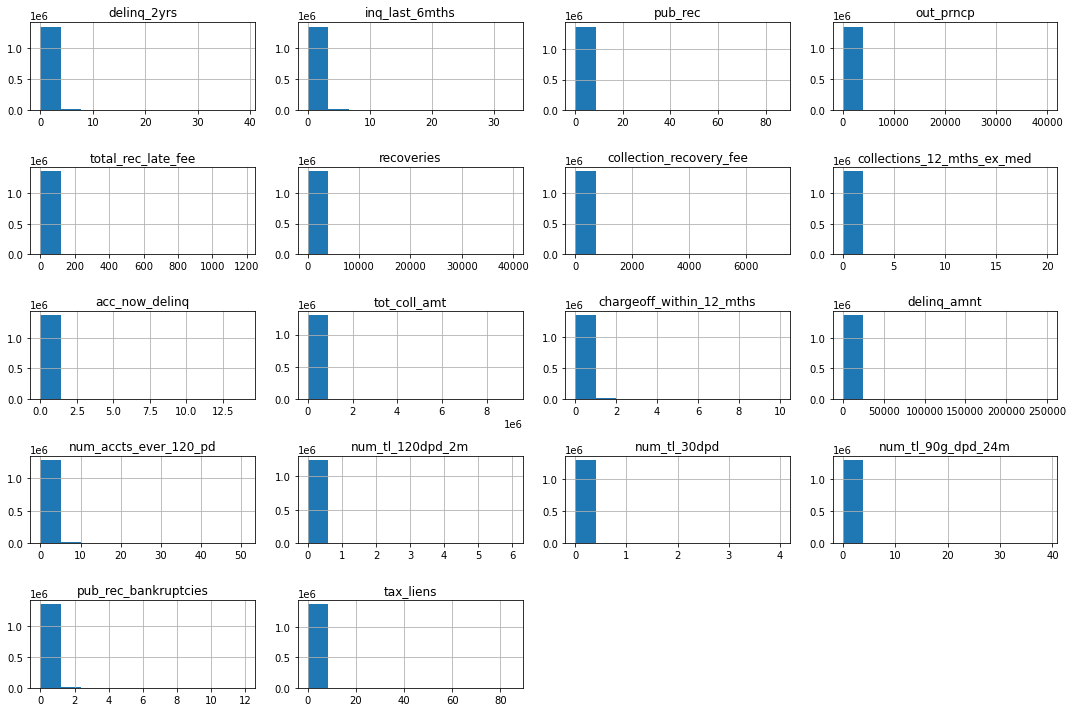

In [216]:
df[zerovalue].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

In [215]:
(df[zerovalue].isnull().sum()/df.shape[0]).sort_values(ascending = False)

num_tl_120dpd_2m              0.088722
num_tl_90g_dpd_24m            0.051313
num_tl_30dpd                  0.051313
num_accts_ever_120_pd         0.051313
tot_coll_amt                  0.051313
pub_rec_bankruptcies          0.000997
chargeoff_within_12_mths      0.000106
collections_12_mths_ex_med    0.000106
tax_liens                     0.000077
inq_last_6mths                0.000022
pub_rec                       0.000021
acc_now_delinq                0.000021
delinq_amnt                   0.000021
delinq_2yrs                   0.000021
recoveries                    0.000000
total_rec_late_fee            0.000000
out_prncp                     0.000000
collection_recovery_fee       0.000000
dtype: float64

num_tl_120dpd_2m and num_tl_30dpd updated ones for 2 months, tot_coll_amt has a huge varition, 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt', 'acc_now_delinq' have mostly 0 values, 'pub_rec_bankruptcies', 'pub_rec', have some values are 1, all the rest are zero. out_prncp
The featues related to delinq and frenquet inquries are kept so far, 'num_accts_ever_120_pd', 'delinq_2yrs', 'inq_last_6mths'. 

In [217]:
keep1_list = ['num_accts_ever_120_pd', 'delinq_2yrs', 'inq_last_6mths']
zerovalue_droplist = [e for e in zerovalue if e not in keep1_list]
zerovalue_droplist

['pub_rec',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'tax_liens']

In [218]:
df.shape

(1369566, 72)

In [219]:
df.drop(columns = zerovalue_droplist, inplace = True)

In [220]:
df.shape

(1369566, 57)

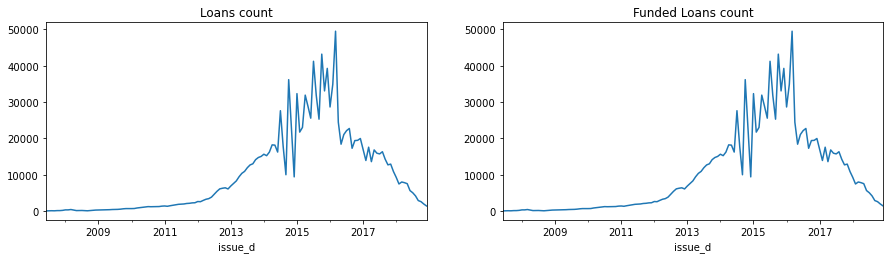

In [235]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.groupby('issue_d')['loan_amnt'].count().plot(figsize = (15, 8), title = 'Loans count')

plt.subplot(2, 2, 2)
df.groupby('issue_d')['funded_amnt'].count().plot(figsize = (15, 8), title = 'Funded Loans count')
plt.show()

only keep loan_amnt

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

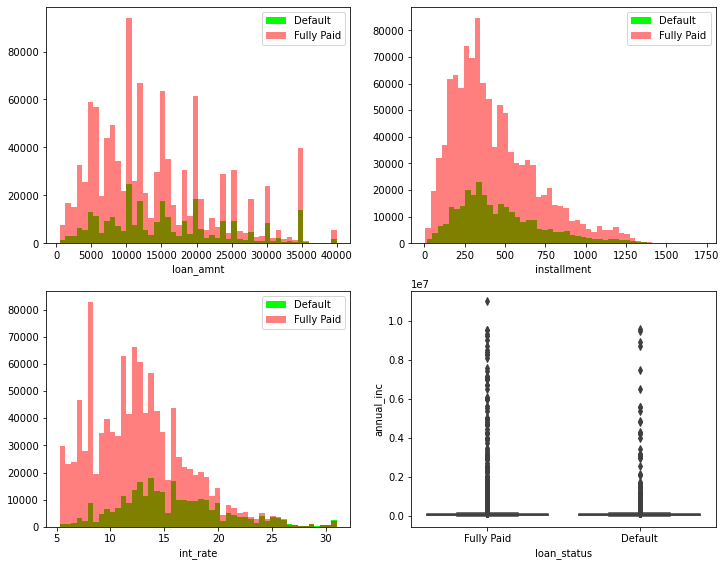

In [259]:
#plt.figure(figsize=(12, 20))
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
sns.distplot(df[df.loan_status == 'Default'].loan_amnt, kde=False, label= 'Default', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":1})
sns.distplot(df[df.loan_status == 'Fully Paid'].loan_amnt, kde=False, label = 'Fully Paid', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 2)
sns.distplot(df[df.loan_status == 'Default'].installment, kde=False, label= 'Default', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":1})
sns.distplot(df[df.loan_status == 'Fully Paid'].installment, kde=False, label = 'Fully Paid', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 3)
sns.distplot(df[df.loan_status == 'Default'].int_rate, kde=False, label= 'Default', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":1})
sns.distplot(df[df.loan_status == 'Fully Paid'].int_rate, kde=False, label = 'Fully Paid', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("int_rate")

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='annual_inc', data=df)

Most of loan are around 10k, and some high amount loan are around 35k. Installments have similar distribution between paid and default, it could be more related to tha loan_amount they have. Most of fully paid have relative lower int_Rate. default has diverse range, some can be as high as more than 30. Fully paid group has higher annual income.

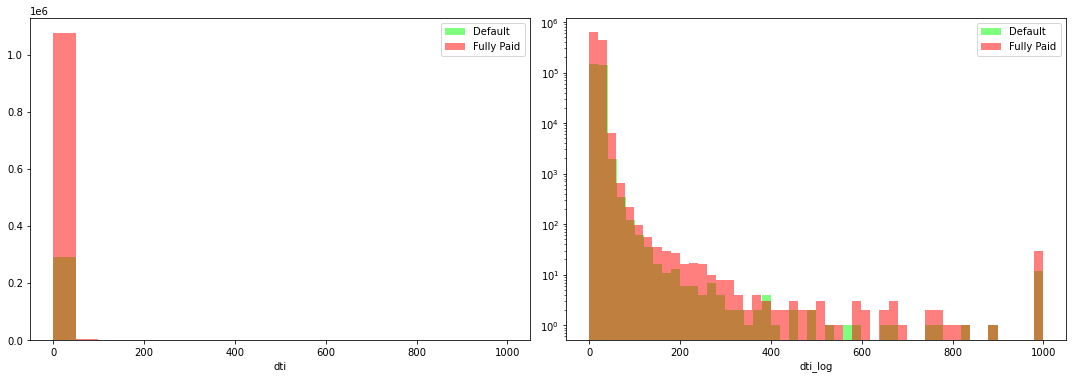

In [265]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.distplot(df[df.loan_status == 'Default'].dti, kde=False, bins =20, label= 'Default', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":0.5})
sns.distplot(df[df.loan_status == 'Fully Paid'].dti, kde=False, bins=20, label= 'Fully Paid', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("dti")

plt.subplot(2, 2, 2)
sns.distplot(df[df.loan_status == 'Default'].dti, kde=False, label= 'Default', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":0.5})
sns.distplot(df[df.loan_status == 'Fully Paid'].dti, kde=False, label= 'Fully Paid', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("dti_log")
plt.yscale("log")

plt.tight_layout()

In [277]:
df[['annual_inc', 'dti']].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9, .95, .99])      

annual_inc           dti
count  1.369562e+06  1.369168e+06
mean   7.625009e+04  1.830368e+01
std    7.031078e+04  1.131197e+01
min    0.000000e+00 -1.000000e+00
1%     1.800000e+04  1.760000e+00
10%    3.400000e+04  7.260000e+00
20%    4.200000e+04  1.049000e+01
30%    5.000000e+04  1.302000e+01
40%    5.700000e+04  1.533000e+01
50%    6.500000e+04  1.762000e+01
60%    7.400000e+04  2.000000e+01
70%    8.500000e+04  2.261000e+01
80%    1.000000e+05  2.571000e+01
90%    1.250000e+05  2.981000e+01
95%    1.550000e+05  3.302000e+01
99%    2.520000e+05  3.856000e+01
max    1.099920e+07  9.990000e+02

In [282]:
#dti is negative is fully paid group and high income, they will imputed or exclued for prediction.
df[df['dti']<0]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
1014615    15000.0      15000.0    36      9.75       482.25     B        B3   
1681348    17000.0      17000.0    60     13.49       391.08     C        C2   

         emp_length home_ownership  annual_inc    issue_d loan_status  \
1014615           5       MORTGAGE     94000.0 2016-03-01  Fully Paid   
1681348          10       MORTGAGE     75000.0 2017-03-01  Fully Paid   

                    purpose addr_state  dti  delinq_2yrs  fico_range_low  \
1014615  debt_consolidation         OR -1.0          0.0           670.0   
1681348  debt_consolidation         IN -1.0          1.0           685.0   

         fico_range_high  inq_last_6mths  mths_since_last_delinq  open_acc  \
1014615            674.0             0.0                    63.0      12.0   
1681348            689.0             0.0                    23.0      12.0   

         revol_bal  revol_util  total_acc  total_rec_prncp  total_rec_int  \
1014615    15445.0        45.8       24.0          15000.0        1188.78   
1681348    44587.0        78.2       34.0          17000.0        3423.50   

        application_type  tot_cur_bal  total_rev_hi_lim  acc_open_past_24mths  \
1014615       Individual      93070.0           33700.0                   8.0   
1681348        Joint App     299893.0           57000.0                   2.0   

         avg_cur_bal  bc_open_to_buy  bc_util  mo_sin_old_il_acct  \
1014615       8461.0          3942.0     61.7                98.0   
1681348      24991.0          3242.0     89.6               162.0   

         mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  \
1014615                 150.0                    2.0             2.0   
1681348                 294.0                   15.0             8.0   

         mort_acc  mths_since_recent_bc  mths_since_recent_inq  \
1014615       1.0                  15.0                   10.0   
1681348       3.0                  27.0                    2.0   

         num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  \
1014615                    0.0             3.0              5.0          3.0   
1681348                    0.0             5.0             10.0          5.0   

         num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  \
1014615        6.0       10.0            9.0           13.0   
1681348        8.0        9.0           10.0           22.0   

         num_rev_tl_bal_gt_0  num_sats  num_tl_op_past_12m  pct_tl_nvr_dlq  \
1014615                  5.0      11.0                 3.0            95.8   
1681348                 10.0      12.0                 1.0            91.2   

         percent_bc_gt_75  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
1014615              33.3         127743.0            93070.0         10300.0   
1681348              40.0         333184.0            84919.0         31100.0   

         total_il_high_credit_limit  
1014615                     94043.0  
1681348                     42668.0

In [287]:
df[df['dti']>800]#high debt to income ratio may be not reliable/outlier, will be imputed or exclued for prediction.

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
8721        6550.0       6550.0    36     17.86       236.34     D        D5   
452427      8000.0       8000.0    36      7.96       250.55     A        A5   
462653     17000.0      17000.0    60     15.05       404.88     C        C4   
468382      2400.0       2400.0    36     21.45        90.98     D        D5   
477824     10250.0      10250.0    36     11.99       340.40     B        B5   
512853     14225.0      14225.0    36      9.93       458.54     B        B2   
529350     15000.0      15000.0    60     17.09       373.52     D        D1   
529560     26000.0      26000.0    60      9.93       551.53     B        B2   
543017     21000.0      21000.0    60     13.59       484.19     C        C2   
547555     10000.0      10000.0    60     20.00       264.94     D        D4   
568955     35000.0      35000.0    60     30.99      1153.75     G        G5   
579633     16000.0      16000.0    36     11.99       531.36     B        B5   
586526     35000.0      35000.0    36     14.08      1197.58     C        C3   
606144     16800.0      16800.0    60     21.45       458.76     D        D5   
607647     30000.0      30000.0    60     26.30       903.55     E        E5   
609678     10000.0      10000.0    36     14.08       342.17     C        C3   
618546      7000.0       7000.0    36      7.35       217.27     A        A4   
623821     29600.0      29600.0    60     16.02       720.13     C        C5   
625865     15000.0      15000.0    36     21.45       568.60     D        D5   
639371     10000.0      10000.0    36     13.59       339.79     C        C2   
646756     10000.0      10000.0    60     14.08       233.10     C        C3   
651390     35000.0      35000.0    60     30.17      1136.03     F        F3   
683735     24000.0      24000.0    36      9.16       764.99     B        B2   
695925     35000.0      35000.0    36      9.75      1125.25     B        B3   
710457     35000.0      35000.0    36     17.27      1252.56     D        D2   
842277     20375.0      20375.0    36     10.08       658.21     B        B1   
937303     35000.0      35000.0    36     18.99      1282.79     D        D3   
943329     19500.0      19500.0    60     14.99       463.81     C        C4   
982080     20500.0      20500.0    60     22.74       574.85     E        E1   
1399798    10000.0      10000.0    60     25.34       295.51     E        E3   
1483001    24000.0      24000.0    36     13.06       809.35     C        C1   
1563973    15000.0      15000.0    60     10.90       325.39     B        B4   
1673799    28000.0      28000.0    60     11.39       614.25     B        B3   
1687964     6000.0       6000.0    36     14.99       207.97     C        C4   
1719462    28000.0      28000.0    36     11.49       923.20     B        B5   
1724327    35000.0      35000.0    36     10.49      1137.43     B        B2   
1958052    35000.0      35000.0    36     12.79      1175.76     C        C1   
2042219    28000.0      28000.0    36     13.59       951.41     C        C2   
2059137    26000.0      26000.0    60     23.88       746.16     E        E2   
2075586     5000.0       5000.0    36      7.35       155.19     A        A4   
2109336    13000.0      13000.0    60     18.06       330.54     D        D2   
2127818    18000.0      18000.0    36      9.44       576.09     B        B1   
2141667    32000.0      32000.0    60     23.88       918.35     E        E2   
2180305    35000.0      35000.0    36     21.49      1327.45     D        D5   
2205379    12000.0      12000.0    36     17.99       433.77     D        D2   
2217293    10000.0      10000.0    36     13.49       339.31     C        C2   
2227387    40000.0      40000.0    60     14.99       951.39     C        C4   

         emp_length home_ownership  annual_inc    issue_d loan_status  \
8721              0       MORTGAGE      1770.0 2015-12-01  Fully Paid   
452427            1   

In [293]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'application_type',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim'

In [295]:
df.drop(columns = 'funded_amnt', inplace = True)

In [296]:
df.shape

(1369566, 56)

In [297]:
#check what features were kept and how are the missing values
missing2 = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing2.columns=['count', '%']
missing2.sort_values(by='count', ascending = False).head()

count          %
mths_since_last_delinq  690126  50.390124
mths_since_recent_inq   178574  13.038729
mo_sin_old_il_acct      109109   7.966684
pct_tl_nvr_dlq           70430   5.142505
avg_cur_bal              70299   5.132940

**combine accepted and rejected loans**

In [298]:
# we want to predict the loan acceptence and rejection, so we want to combine the dataset and 
#keep the information concerning about the loans that accepted (containing available payment outcome) and rejected
# look at the variables of interest_loan status_accepted (fully paid and charged-off) 
# and rejected (assume the application date is the date rejected, and there are no additional features in rejected dateset)
# rename columns and identify common features between accepted and rejected dataset
rejected_columns = ['loan_amnt', 'issue_d', 'purpose', 'risk_score', 'dti', 'zip_code', 'addr_state', 'emp_length','policy_code']
columns_drop = ['risk_score', 'policy_code', 'zip_code', 'addr_state']
rejected.columns = rejected_columns
rej = rejected.drop(columns_drop, axis=1)

In [299]:
rejected.head()

loan_amnt     issue_d                           purpose  risk_score  \
0     1000.0  2007-05-26  Wedding Covered but No Honeymoon       693.0   
1     1000.0  2007-05-26                Consolidating Debt       703.0   
2    11000.0  2007-05-27       Want to consolidate my debt       715.0   
3     6000.0  2007-05-27                           waksman       698.0   
4     1500.0  2007-05-27                            mdrigo       509.0   

      dti zip_code addr_state emp_length  policy_code  
0     10%    481xx         NM    4 years          0.0  
1     10%    010xx         MA   < 1 year          0.0  
2     10%    212xx         MD     1 year          0.0  
3  38.64%    017xx         MA   < 1 year          0.0  
4   9.43%    209xx         MD   < 1 year          0.0

In [300]:
rej.head()

loan_amnt     issue_d                           purpose     dti emp_length
0     1000.0  2007-05-26  Wedding Covered but No Honeymoon     10%    4 years
1     1000.0  2007-05-26                Consolidating Debt     10%   < 1 year
2    11000.0  2007-05-27       Want to consolidate my debt     10%     1 year
3     6000.0  2007-05-27                           waksman  38.64%   < 1 year
4     1500.0  2007-05-27                            mdrigo   9.43%   < 1 year

In [301]:
rejected.dtypes

loan_amnt      float64
issue_d         object
purpose         object
risk_score     float64
dti             object
zip_code        object
addr_state      object
emp_length      object
policy_code    float64
dtype: object

In [302]:
rej.dtypes

loan_amnt     float64
issue_d        object
purpose        object
dti            object
emp_length     object
dtype: object

In [303]:
rej['dti'] = rej.dti.str.strip('\%').astype(float)

In [304]:
rej.dtypes

loan_amnt     float64
issue_d        object
purpose        object
dti           float64
emp_length     object
dtype: object

In [305]:
rej['dti'] = (rej['dti'] / 100).round(2)

In [306]:
rej.head()

loan_amnt     issue_d                           purpose   dti emp_length
0     1000.0  2007-05-26  Wedding Covered but No Honeymoon  0.10    4 years
1     1000.0  2007-05-26                Consolidating Debt  0.10   < 1 year
2    11000.0  2007-05-27       Want to consolidate my debt  0.10     1 year
3     6000.0  2007-05-27                           waksman  0.39   < 1 year
4     1500.0  2007-05-27                            mdrigo  0.09   < 1 year

In [307]:
#emp_length
rej['emp_length'].value_counts(dropna=False).sort_index()

1 year         267840
10+ years      416384
2 years        199204
3 years        177344
4 years        121623
5 years       2279466
6 years         71625
7 years         55666
8 years         65965
9 years         47954
< 1 year     22994315
NaN            951355
Name: emp_length, dtype: int64

In [308]:
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

In [309]:
rej.emp_length = rej.emp_length.map(emp_length_map).fillna(0).astype('int32')

In [310]:
rej.head()

loan_amnt     issue_d                           purpose   dti  emp_length
0     1000.0  2007-05-26  Wedding Covered but No Honeymoon  0.10           4
1     1000.0  2007-05-26                Consolidating Debt  0.10           0
2    11000.0  2007-05-27       Want to consolidate my debt  0.10           1
3     6000.0  2007-05-27                           waksman  0.39           0
4     1500.0  2007-05-27                            mdrigo  0.09           0

In [312]:
rej['issue_d'] = pd.to_datetime(rej['issue_d'])

In [313]:
rej.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
dtype: object

In [314]:
missing3 = pd.concat([rej.isnull().sum(), 100 * rej.isnull().mean()], axis=1)
missing3.columns=['count', '%']
missing3.sort_values(by='count', ascending = False)

count         %
purpose      1303  0.004713
loan_amnt       0  0.000000
issue_d         0  0.000000
dti             0  0.000000
emp_length      0  0.000000

In [318]:
rej_purpose_list = rej['purpose'].unique().tolist()

In [319]:
rej_purpose_list 

['Wedding Covered but No Honeymoon',
 'Consolidating Debt',
 'Want to consolidate my debt',
 'waksman',
 'mdrigo',
 'Trinfiniti',
 'NOTIFYi Inc',
 'For Justin.',
 'title?',
 'timgerst',
 'need to consolidate',
 'sixstrings',
 'bmoore5110',
 'MHarkins',
 'Moving',
 'Recent College Grad Wants to Pay Off CCs',
 'FoundersCafe.com',
 'UChicago2004',
 'Cancer is Killing My Credit',
 '2006-2007 College Debt Loan',
 'twbmc',
 'Bills & Vacation',
 'Vehicle Purchase/Used Auto',
 'thejanman',
 'Finish Off College',
 'Phuocpnn',
 'Established borrower consolodating debt',
 'mainmanandy',
 'Jaguar10301',
 'rpinho78',
 'ashtru',
 'sparks',
 'big fat lender',
 'toeeeekne',
 'stnthoma22',
 'natbunn',
 'SGearhart1381',
 '2dozen',
 'Good Heart Bad Credit!',
 'mbcoon',
 'boardwalk',
 'danthe83',
 'maryk2001',
 'ppatti113',
 'spidermonkey07',
 'brock1jd',
 'jprice1542',
 'mashowar',
 'jaynesweet',
 'memorial',
 'Fleurdetragedie',
 'jfirson',
 'cdc',
 'katiemass',
 'A clean sweep before buying a new house'

It is very diffult to category the purpse in rejected data, is the rejection because of unclear purpose?

In [320]:
# prepare to combine the data rej and subsetted acce
rej_columns = rej.columns
rej_columns

Index(['loan_amnt', 'issue_d', 'purpose', 'dti', 'emp_length'], dtype='object')

In [321]:
df_m = df[rej_columns]

In [322]:
df_m.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
dtype: object

In [328]:
#add new column in acce_m and rej to define accepted or rejected status
df_m.loc[:,'accepted'] = '1'
rej.loc[:, 'accepted'] = '0'

C:\Users\dongw\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [329]:
df_m.head()

loan_amnt    issue_d             purpose    dti  emp_length accepted
0     3600.0 2015-12-01  debt_consolidation   5.91          10        1
1    24700.0 2015-12-01      small_business  16.06          10        1
2    20000.0 2015-12-01    home_improvement  10.78          10        1
4    10400.0 2015-12-01      major_purchase  25.37           3        1
5    11950.0 2015-12-01  debt_consolidation  10.20           4        1

In [330]:
df_m.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
accepted              object
dtype: object

In [331]:
df_m.shape

(1369566, 6)

In [337]:
df_m.loc[:,'accepted']= df_m.accepted.astype('int32')

C:\Users\dongw\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [338]:
df_m.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
accepted               int32
dtype: object

In [339]:
rej.loc[:,'accepted']= rej.accepted.astype('int32')

In [340]:
rej.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
accepted               int32
dtype: object

In [341]:
df_bind = pd.concat([df_m, rej])

In [342]:
#merge acce_m and rej with commone features
df_bind.head(10)

loan_amnt    issue_d             purpose    dti  emp_length  accepted
0      3600.0 2015-12-01  debt_consolidation   5.91          10         1
1     24700.0 2015-12-01      small_business  16.06          10         1
2     20000.0 2015-12-01    home_improvement  10.78          10         1
4     10400.0 2015-12-01      major_purchase  25.37           3         1
5     11950.0 2015-12-01  debt_consolidation  10.20           4         1
6     20000.0 2015-12-01  debt_consolidation  14.67          10         1
7     20000.0 2015-12-01      major_purchase  17.61          10         1
8     10000.0 2015-12-01         credit_card  13.07           6         1
9      8000.0 2015-12-01         credit_card  34.80          10         1
12     1400.0 2015-12-01               other  34.95           3         1

In [343]:
df_bind.dtypes

loan_amnt            float64
issue_d       datetime64[ns]
purpose               object
dti                  float64
emp_length             int32
accepted               int32
dtype: object

In [344]:
df.shape

(1369566, 56)

In [345]:
df_bind.shape

(29018307, 6)

In [352]:
compression_opts = dict(method='zip',
                        archive_name='df_merge_cleaned.csv')  
df_m.to_csv('df_merge_cleaned.zip', index=False,
          compression=compression_opts)  

In [353]:
compression_opts = dict(method='zip',
                        archive_name='df_acce_cleaned.csv')  
df.to_csv('df_acce_cleaned.zip', index=False,
          compression=compression_opts)  